# Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [42]:
data = pd.read_csv('/kaggle/input/bengali-sms-dataset/bangla_smish.csv')
data.rename(columns={'label': 'Label'}, inplace=True)
data

,Label,text
0,smish,বাংলাদেশ ব্যাংক থেকে গুরুত্বপূর্ণ বার্তা। জরুর...
1,normal,আপনার দিন কেমন কাটছে?
2,promo,"৪৫৳ ক্যাশব্যাক! ৪৬জিবি @ ৪৫৩৳, ৩০দিন, নিয়ে নাও..."
3,normal,"হ্যালো, কি খবর?"
4,smish,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা হয়েছে। কল করুন...
...,...,...
2282,promo,বোনাস সহ ৩জিবি-৬০টাকা-৩দিন। ডায়াল *১২১*৫৬৯৯# ব...
2283,promo,"নতুন স্যামসাং ফোনে ১০% ডিসকাউন্ট! স্টক সীমিত, ..."
2284,normal,শুভ অসুস্থ্য দিনের শুভেচ্ছা!
2285,normal,আপনার কেমন দিন কাটছে?


In [43]:
data.head()

,Label,text
0,smish,বাংলাদেশ ব্যাংক থেকে গুরুত্বপূর্ণ বার্তা। জরুর...
1,normal,আপনার দিন কেমন কাটছে?
2,promo,"৪৫৳ ক্যাশব্যাক! ৪৬জিবি @ ৪৫৩৳, ৩০দিন, নিয়ে নাও..."
3,normal,"হ্যালো, কি খবর?"
4,smish,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা হয়েছে। কল করুন...


In [44]:
data.shape

(2287, 2)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   2287 non-null   object
 1   text    2287 non-null   object
dtypes: object(2)
memory usage: 35.9+ KB


In [46]:
data.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,normal,924
1,promo,449
2,smish,914


In [47]:
def punctuation_removal(text): 
    text = re.sub('[^\u0980-\u09FF]',' ',text)
    text = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_৳]', '', text)
    text = re.sub(r'(\W)(?=\1)', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'ߑͰߑ̰ߒנ', '', text)
    text = re.sub(r'ߎɰߎɰߎɍ', '', text)
    return text

In [48]:
data['Cleaned'] = [punctuation_removal(text) for text in data['text']]
data

,Label,text,Cleaned
0,smish,বাংলাদেশ ব্যাংক থেকে গুরুত্বপূর্ণ বার্তা। জরুর...,বাংলাদেশ ব্যাংক থেকে গুরুত্বপূর্ণ বার্তা জরুরি...
1,normal,আপনার দিন কেমন কাটছে?,আপনার দিন কেমন কাটছে
2,promo,"৪৫৳ ক্যাশব্যাক! ৪৬জিবি @ ৪৫৩৳, ৩০দিন, নিয়ে নাও...",৪৫ ক্যাশব্যাক ৪৬জিবি ৪৫৩ ৩০দিন নিয়ে নাও এখনই
3,normal,"হ্যালো, কি খবর?",হ্যালো কি খবর
4,smish,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা হয়েছে। কল করুন...,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা হয়েছে কল করুন
...,...,...,...
2282,promo,বোনাস সহ ৩জিবি-৬০টাকা-৩দিন। ডায়াল *১২১*৫৬৯৯# ব...,বোনাস সহ ৩জিবি ৬০টাকা ৩দিন ডায়াল ১২১ ৫৬৯৯ বা
2283,promo,"নতুন স্যামসাং ফোনে ১০% ডিসকাউন্ট! স্টক সীমিত, ...",নতুন স্যামসাং ফোনে ১০ ডিসকাউন্ট স্টক সীমিত আজই...
2284,normal,শুভ অসুস্থ্য দিনের শুভেচ্ছা!,শুভ অসুস্থ্য দিনের শুভেচ্ছা
2285,normal,আপনার কেমন দিন কাটছে?,আপনার কেমন দিন কাটছে


In [49]:
stopword_ls ='/kaggle/input/stop-words/stopwords-bn.txt'

In [50]:
def stopword_removal(text,stpwrd= stopword_ls):
    stp,num_of_stopwords =stopwords_info(stpwrd)
    result = text.split()
    Comments = [word.strip() for word in result if word not in stp ]
    Comments =" ".join(Comments)
    return Comments

In [51]:
def stopwords_info(filename):
    stp = open(filename,'r',encoding='utf-8').read().split()
    num_of_stopwords = len(stp)
    return stp,num_of_stopwords

In [52]:
data['Cleaned'] = data['Cleaned'].apply(stopword_removal)  
data

,Label,text,Cleaned
0,smish,বাংলাদেশ ব্যাংক থেকে গুরুত্বপূর্ণ বার্তা। জরুর...,বাংলাদেশ ব্যাংক গুরুত্বপূর্ণ বার্তা জরুরি ভিত্...
1,normal,আপনার দিন কেমন কাটছে?,কেমন কাটছে
2,promo,"৪৫৳ ক্যাশব্যাক! ৪৬জিবি @ ৪৫৩৳, ৩০দিন, নিয়ে নাও...",৪৫ ক্যাশব্যাক ৪৬জিবি ৪৫৩ ৩০দিন নাও এখনই
3,normal,"হ্যালো, কি খবর?",হ্যালো খবর
4,smish,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা হয়েছে। কল করুন...,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা কল করুন
...,...,...,...
2282,promo,বোনাস সহ ৩জিবি-৬০টাকা-৩দিন। ডায়াল *১২১*৫৬৯৯# ব...,বোনাস ৩জিবি ৬০টাকা ৩দিন ডায়াল ১২১ ৫৬৯৯
2283,promo,"নতুন স্যামসাং ফোনে ১০% ডিসকাউন্ট! স্টক সীমিত, ...",স্যামসাং ফোনে ১০ ডিসকাউন্ট স্টক সীমিত আজই কিনুন
2284,normal,শুভ অসুস্থ্য দিনের শুভেচ্ছা!,শুভ অসুস্থ্য দিনের শুভেচ্ছা
2285,normal,আপনার কেমন দিন কাটছে?,কেমন কাটছে


In [53]:
data['length'] = data['Cleaned'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 28 Small Text 
Total Text: 2259


In [54]:
def data_summary(dataset):
    
    """
    This function will print the summary of the Text and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].Cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].Cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].Cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  smish
Number of Documents:909
Number of Words:9529
Number of Unique Words:1625
Most Frequent Words:

করুন	796
টাকা	355
ক্লিক	286
কল	238
ব্যাংক	144
ইনকাম	125
০০০	121
বিস্তারিত	109
বাজি	97
ধরুন	97

Class Name :  normal
Number of Documents:904
Number of Words:3660
Number of Unique Words:1185
Most Frequent Words:

নাম্বারে	98
টাকা	94
কেমন	93
করুন	79
শুভ	70
না	54
ভালো	52
কল	43
খবর	41
আছি	38

Class Name :  promo
Number of Documents:446
Number of Words:4009
Number of Unique Words:1122
Most Frequent Words:

৩০দিন	152
১২১	75
ক্যাশব্যাক	71
নাও	70
ডায়াল	70
করুন	59
অফার	56
বোনাস	46
ছাড়	45
ডিসকাউন্ট	45
Total Number of Unique Words:3320


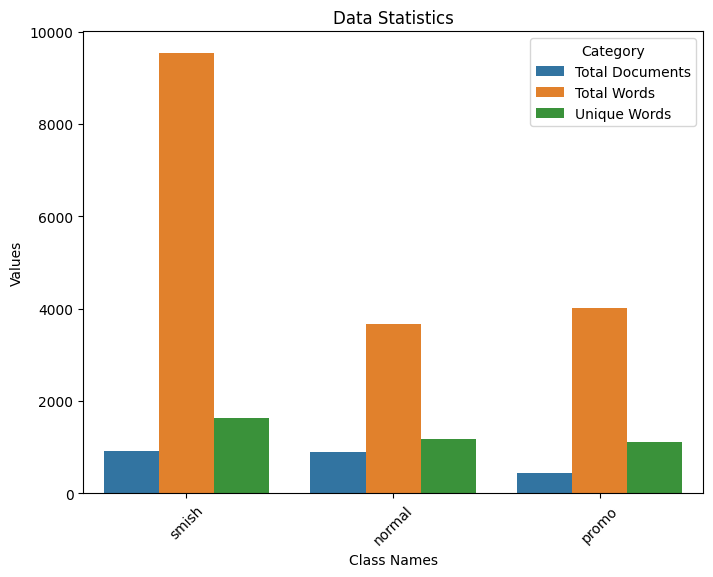

In [55]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

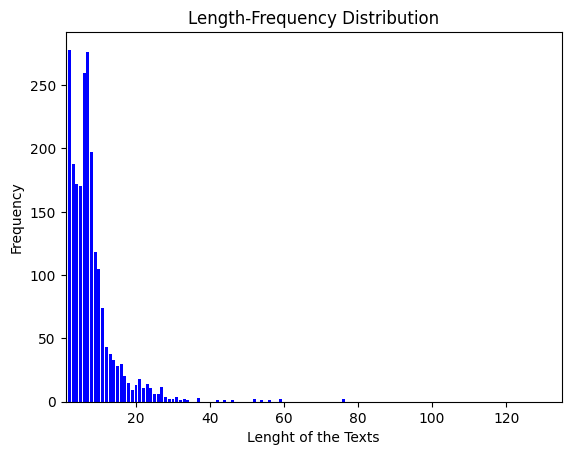

Maximum Length of a Text: 76
Minimum Length of a Text: 1
Average Length of a Text: 8.0


In [56]:
dataset['TextLength'] = dataset.Cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [57]:
dataset.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,normal,904
1,promo,446
2,smish,909


# 0 = Normal, 1 = Promo, 2 = Smish

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(sentiment,bool):
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

data

,Label,text,Cleaned,length
0,smish,বাংলাদেশ ব্যাংক থেকে গুরুত্বপূর্ণ বার্তা। জরুর...,বাংলাদেশ ব্যাংক গুরুত্বপূর্ণ বার্তা জরুরি ভিত্...,8
1,normal,আপনার দিন কেমন কাটছে?,কেমন কাটছে,2
2,promo,"৪৫৳ ক্যাশব্যাক! ৪৬জিবি @ ৪৫৩৳, ৩০দিন, নিয়ে নাও...",৪৫ ক্যাশব্যাক ৪৬জিবি ৪৫৩ ৩০দিন নাও এখনই,7
3,normal,"হ্যালো, কি খবর?",হ্যালো খবর,2
4,smish,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা হয়েছে। কল করুন...,জনতা ব্যাংক অ্যাকাউন্টে সমস্যা কল করুন,6
...,...,...,...,...
2282,promo,বোনাস সহ ৩জিবি-৬০টাকা-৩দিন। ডায়াল *১২১*৫৬৯৯# ব...,বোনাস ৩জিবি ৬০টাকা ৩দিন ডায়াল ১২১ ৫৬৯৯,7
2283,promo,"নতুন স্যামসাং ফোনে ১০% ডিসকাউন্ট! স্টক সীমিত, ...",স্যামসাং ফোনে ১০ ডিসকাউন্ট স্টক সীমিত আজই কিনুন,8
2284,normal,শুভ অসুস্থ্য দিনের শুভেচ্ছা!,শুভ অসুস্থ্য দিনের শুভেচ্ছা,4
2285,normal,আপনার কেমন দিন কাটছে?,কেমন কাটছে,2


In [59]:
def dataset_split(feature_space,sentiment):
    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.20,random_state =22,stratify=sentiment)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [60]:
def calc_gram_tfidf(reviews,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [61]:
def calc_unigram_tfidf(reviews):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [62]:
def calc_bigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [63]:
def calc_trigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [64]:
def model_defination():
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [65]:
def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [66]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [70]:
import pickle
ml_models, model_names = model_defination()
tfidf, X = calc_unigram_tfidf(dataset['Cleaned'])
labels = label_encoding(dataset['Label'], False)
X_train, X_test, y_train, y_test = dataset_split(X, labels)

performance_dict = {}

for i, model in enumerate(ml_models):
    performance_dict[model_names[i]] = model_performace(model, X_train, X_test, y_train, y_test)
    
    if model_names[i] == 'SGD':
        
        with open('sgd_model.pkl', 'wb') as f:
            pickle.dump(model, f)

performance_df = pd.DataFrame.from_dict(performance_dict, orient='index')
performance_df.reset_index(inplace=True)
performance_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

print(performance_df)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 3320

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2259 
	Training		 1807 
	Test			 452


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     94.91      94.91   94.91     94.91
1        Decision Tree     68.81      68.81   68.81     68.81
2        Random Forest     96.02      96.02   96.02     96.02
3          Naive Bayes     96.46      96.46   96.46     96.46
4                  KNN     87.83      87.83   87.83     87.83
5           Linear SVM     93.36      93.36   93.36     93.36
6           Kernel SVM     93.81      93.81   93.81     93.81
7                  SGD     97.12      97.12   97.12     97.12


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [69]:
import pickle

 if model_names[i] == 'SGD':
        
        with open('sgd_model.pkl', 'wb') as f:
            pickle.dump(model, f)

IndentationError: unexpected indent (3345618230.py, line 3)

 # EDA